In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Load Data
df = pd.read_csv('/content/df_cleaned (2).csv')  # Replace with your actual dataset filename
target = 'popular'  # Replace with your target column name

df

,popular,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,unix_timestamp,edm,latin,pop,r&b,rap,rock
0,1,0.561,0.666,8.0,-4.243000,1,0.021511,0.074760,0.000000,0.071226,0.675,5.081522,12.298506,1.576368e+09,0,1,1,0,0,0
1,1,0.600,0.760,6.0,-6.349136,0,0.028245,0.102059,0.000000,0.089770,0.520,5.068904,12.300838,1.589933e+09,0,0,0,0,0,0
2,0,0.532,0.629,10.0,-7.955000,0,0.055915,0.129340,0.000000,0.126971,0.545,4.554193,12.148941,1.302826e+09,0,0,0,0,1,0
3,1,0.570,0.940,1.0,-6.349136,1,0.037783,0.076738,0.000000,0.117442,0.840,5.117994,12.300838,1.681258e+09,0,0,0,0,0,0
4,0,0.804,0.846,6.0,-7.994000,1,0.030216,0.069621,0.000261,0.045456,0.887,4.828338,12.757622,1.539562e+09,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0,0.473,0.973,9.0,-3.378000,1,0.047235,0.122443,0.000042,0.120429,0.847,4.794219,12.186349,1.529021e+09,0,0,0,1,0,0
22408,0,0.429,0.724,3.0,-4.144000,0,0.049337,0.202513,0.000000,0.091110,0.377,4.421235,11.919583,1.539562e+09,1,0,0,0,0,0
22409,0,0.498,0.917,5.0,-1.797000,0,0.046751,0.049446,0.000000,0.116158,0.652,4.730542,12.233751,1.408061e+09,1,0,0,0,0,0
22410,1,0.839,0.902,1.0,-3.612000,0,0.029363,0.064633,0.000237,0.105040,0.639,4.753185,12.149772,1.510704e+09,0,0,1,0,0,0


In [ ]:
# Feature and Target Selection
features = df.drop(columns=[target]).columns
X = df[features]
y = df[target]

# Train-Test Split
seed = 528
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Base Parameters
base_payoff = 150000
base_investment = 30000
delayed_factor = 0.2  # 20% additional chance of delayed popularity

Model: Random Forest
Confusion Matrix:
[[5349   54]
 [ 928  393]]
Accuracy: 0.85
Precision: 0.88
Recall: 0.30
F1 Score: 0.44
ROC-AUC Score: 0.81
Expected Immediate Payoff: $47160000
Expected Delayed Payoff: $75000000.0



<ipython-input-4-23d1402a0715>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


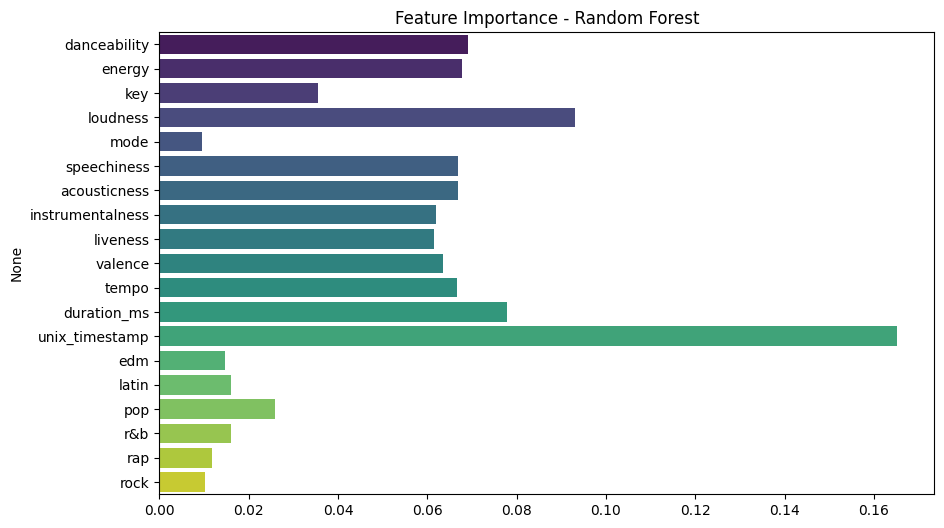

Model: Gradient Boosting
Confusion Matrix:
[[5346   57]
 [ 922  399]]
Accuracy: 0.85
Precision: 0.88
Recall: 0.30
F1 Score: 0.45
ROC-AUC Score: 0.81
Expected Immediate Payoff: $47880000
Expected Delayed Payoff: $75540000.0



<ipython-input-4-23d1402a0715>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


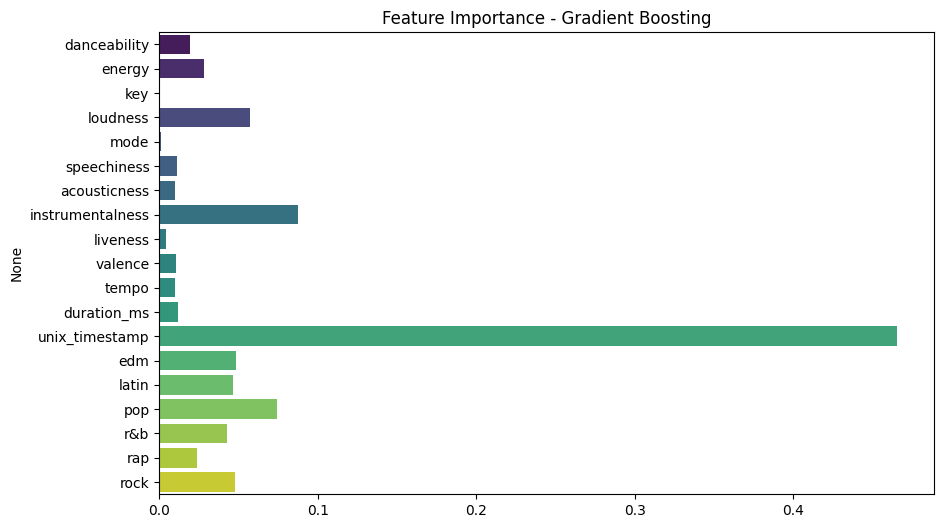

In [ ]:
# Helper Function to Evaluate and Print Results
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")
    roc_auc = roc_auc_score(y_test, y_prob)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Payoffs
    immediate_payoff = tp * (base_payoff - base_investment)
    delayed_payoff = immediate_payoff + fn * delayed_factor * base_payoff

    # Print Results
    print(f"Model: {name}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc_auc:.2f}")
    print(f"Expected Immediate Payoff: ${immediate_payoff}")
    print(f"Expected Delayed Payoff: ${delayed_payoff}\n")

    # Store Results
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "immediate_payoff": immediate_payoff,
        "delayed_payoff": delayed_payoff,
    }

# Train Models
models = {
    "Random Forest": RandomForestClassifier(random_state=seed, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=seed, n_estimators=100)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(name, model, X_test, y_test)

    # Plot Feature Importance if applicable
    if hasattr(model, "feature_importances_"):
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x=model.feature_importances_,
            y=features,
            palette="viridis"
        )
        plt.title(f'Feature Importance - {name}')
        plt.show()

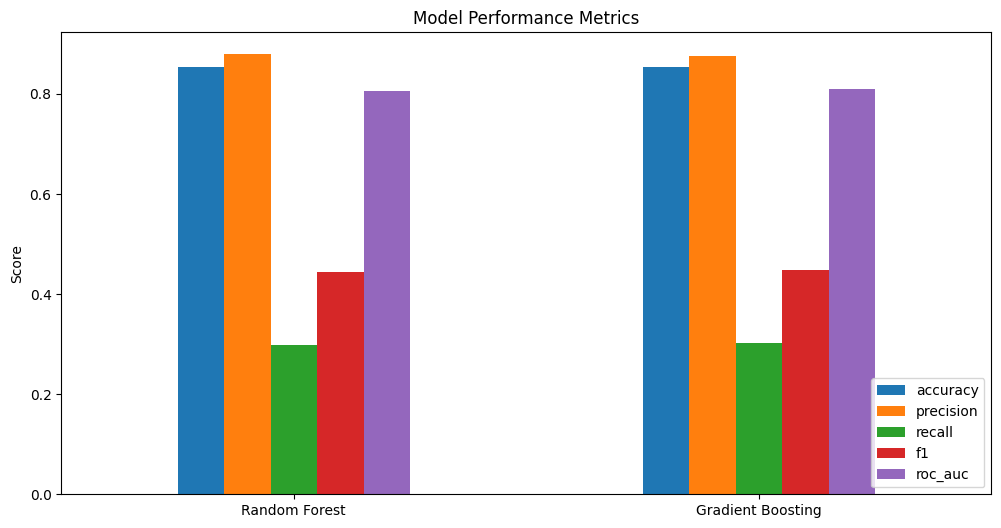

In [ ]:
# Comparative Diagram
metrics_df = pd.DataFrame(results).T
metrics_df[["accuracy", "precision", "recall", "f1", "roc_auc"]].plot(kind="bar", figsize=(12, 6), title="Model Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

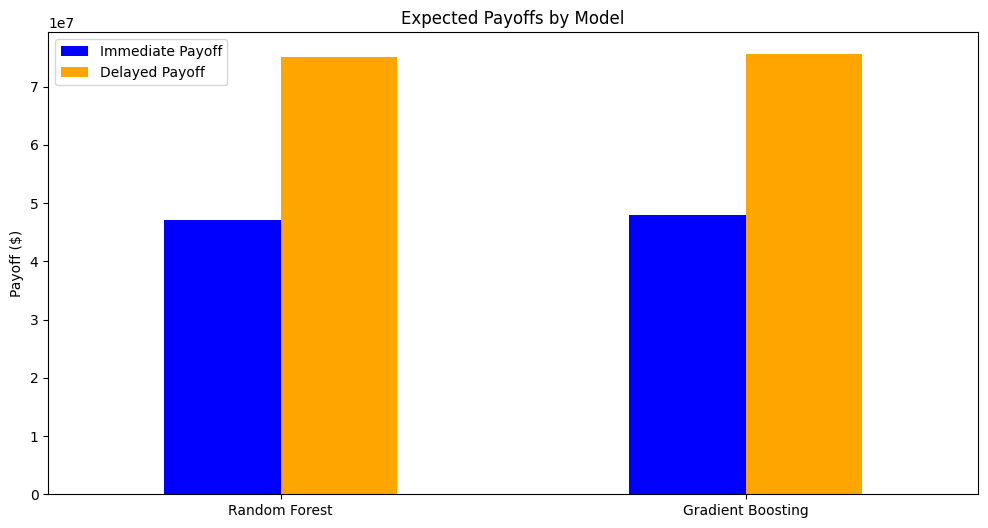

In [ ]:
# Comparative Payoffs
payoffs_df = metrics_df[["immediate_payoff", "delayed_payoff"]]
payoffs_df.plot(kind="bar", figsize=(12, 6), title="Expected Payoffs by Model", color=["blue", "orange"])
plt.ylabel("Payoff ($)")
plt.xticks(rotation=0)
plt.legend(["Immediate Payoff", "Delayed Payoff"], loc="upper left")
plt.show()


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, make_scorer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Constants for Payoff Calculation
BASE_PAYOFF = 150000
BASE_INVESTMENT = 30000
DELAYED_FACTOR = 0.2  # 20% additional chance of delayed popularity

# Load Data
df = pd.read_csv('/content/df_cleaned (2).csv')  # Replace with your actual dataset filename
target = 'popular'  # Replace with your target column name

df

,popular,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,unix_timestamp,edm,latin,pop,r&b,rap,rock
0,1,0.561,0.666,8.0,-4.243000,1,0.021511,0.074760,0.000000,0.071226,0.675,5.081522,12.298506,1.576368e+09,0,1,1,0,0,0
1,1,0.600,0.760,6.0,-6.349136,0,0.028245,0.102059,0.000000,0.089770,0.520,5.068904,12.300838,1.589933e+09,0,0,0,0,0,0
2,0,0.532,0.629,10.0,-7.955000,0,0.055915,0.129340,0.000000,0.126971,0.545,4.554193,12.148941,1.302826e+09,0,0,0,0,1,0
3,1,0.570,0.940,1.0,-6.349136,1,0.037783,0.076738,0.000000,0.117442,0.840,5.117994,12.300838,1.681258e+09,0,0,0,0,0,0
4,0,0.804,0.846,6.0,-7.994000,1,0.030216,0.069621,0.000261,0.045456,0.887,4.828338,12.757622,1.539562e+09,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0,0.473,0.973,9.0,-3.378000,1,0.047235,0.122443,0.000042,0.120429,0.847,4.794219,12.186349,1.529021e+09,0,0,0,1,0,0
22408,0,0.429,0.724,3.0,-4.144000,0,0.049337,0.202513,0.000000,0.091110,0.377,4.421235,11.919583,1.539562e+09,1,0,0,0,0,0
22409,0,0.498,0.917,5.0,-1.797000,0,0.046751,0.049446,0.000000,0.116158,0.652,4.730542,12.233751,1.408061e+09,1,0,0,0,0,0
22410,1,0.839,0.902,1.0,-3.612000,0,0.029363,0.064633,0.000237,0.105040,0.639,4.753185,12.149772,1.510704e+09,0,0,1,0,0,0


In [ ]:
# Feature Engineering
df['hour'] = pd.to_datetime(df['unix_timestamp'], unit='s').dt.hour
df['day_of_week'] = pd.to_datetime(df['unix_timestamp'], unit='s').dt.dayofweek
df['month'] = pd.to_datetime(df['unix_timestamp'], unit='s').dt.month
df = df.drop(columns=['unix_timestamp'])  # Drop original timestamp

# Features and Target
features = df.drop(columns=[target]).columns
X = df[features]
y = df[target]

# Scaling Numerical Features
scaler = StandardScaler()
numerical_features = ['tempo', 'duration_ms', 'loudness']  # Add or modify based on your dataset
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Train-Test Split
seed = 528
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)


<ipython-input-8-28711e2bab75>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [ ]:
# Handle Imbalanced Data with SMOTE
smote = SMOTE(random_state=seed)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Custom Scorer for Profit Maximization
def profit_scorer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    immediate_payoff = tp * (BASE_PAYOFF - BASE_INVESTMENT)
    delayed_payoff = immediate_payoff + fn * DELAYED_FACTOR * BASE_PAYOFF
    return delayed_payoff

profit_metric = make_scorer(profit_scorer, greater_is_better=True)

# Hyperparameter Optimization Function
def optimize_model(model, param_grid, X_train, y_train):
    search = RandomizedSearchCV(
        model, param_distributions=param_grid,
        n_iter=50, scoring=profit_metric, cv=3, random_state=seed, n_jobs=-1
    )
    search.fit(X_train, y_train)
    print(f"Best Parameters for {type(model).__name__}: {search.best_params_}")
    return search.best_estimator_

In [ ]:
# Models and Hyperparameter Grids
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=seed),
    "Random Forest": RandomForestClassifier(random_state=seed),
    "Gradient Boosting": GradientBoostingClassifier(random_state=seed),
}

param_grids = {
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 10],
        'subsample': [0.8, 1.0],
    }
}


Optimizing Decision Tree...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for DecisionTreeClassifier: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Model: Decision Tree
Confusion Matrix:
[[4192 1211]
 [ 671  650]]
Immediate Payoff: $78000000
Delayed Payoff: $98130000.0


<ipython-input-11-419b564296e0>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


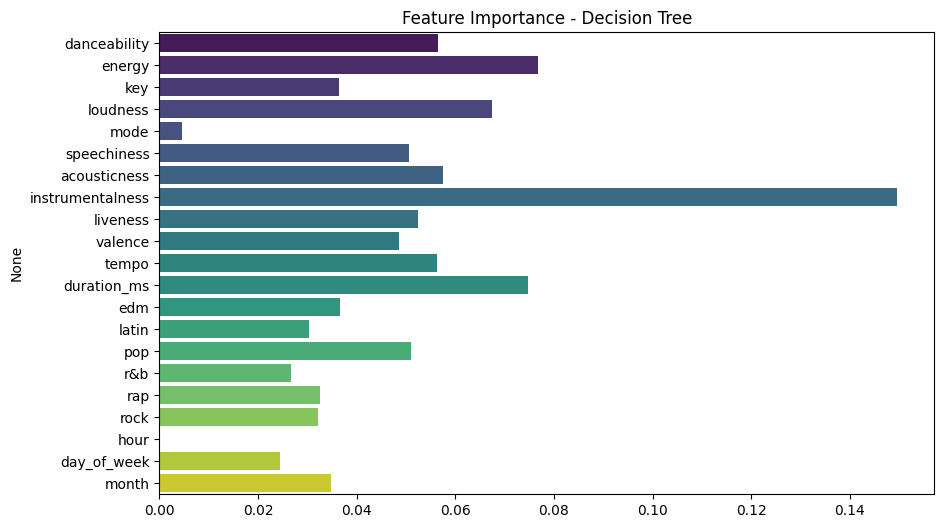


Optimizing Random Forest...
Best Parameters for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Model: Random Forest
Confusion Matrix:
[[4761  642]
 [ 698  623]]
Immediate Payoff: $74760000
Delayed Payoff: $95700000.0


<ipython-input-11-419b564296e0>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


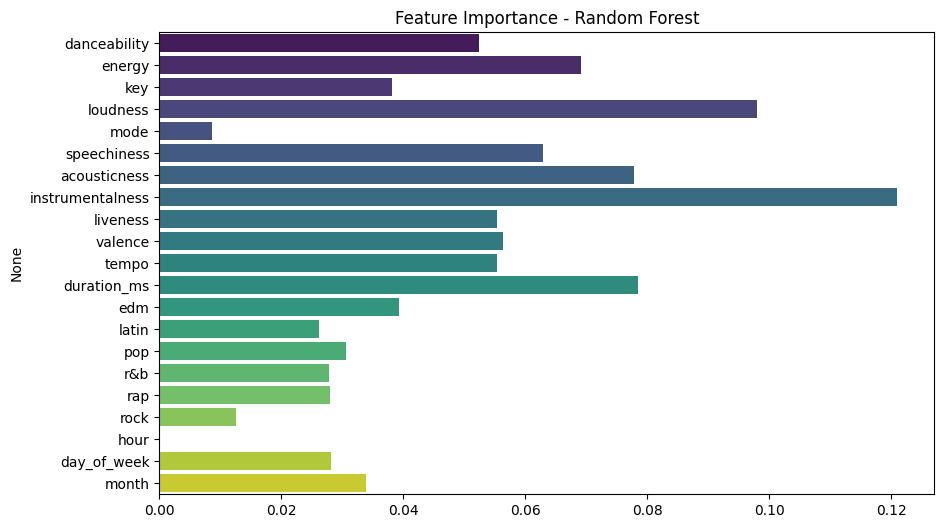


Optimizing Gradient Boosting...
Best Parameters for GradientBoostingClassifier: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
Model: Gradient Boosting
Confusion Matrix:
[[4962  441]
 [ 758  563]]
Immediate Payoff: $67560000
Delayed Payoff: $90300000.0


<ipython-input-11-419b564296e0>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


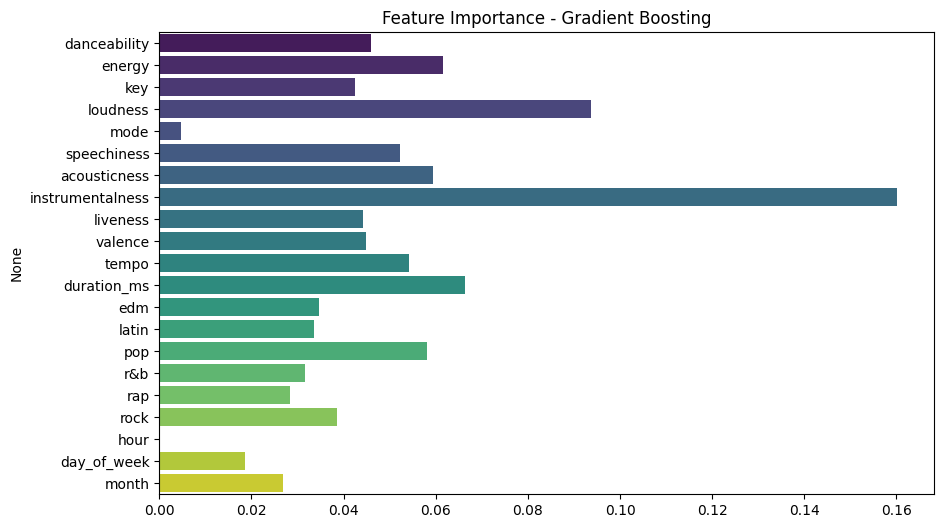

In [ ]:
# Training and Evaluating Models
results = {}
for name, model in models.items():
    print(f"\nOptimizing {name}...")
    optimized_model = optimize_model(model, param_grids[name], X_train, y_train)
    optimized_model.fit(X_train, y_train)

    # Predictions
    y_pred = optimized_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Payoffs
    immediate_payoff = tp * (BASE_PAYOFF - BASE_INVESTMENT)
    delayed_payoff = immediate_payoff + fn * DELAYED_FACTOR * BASE_PAYOFF

    # Metrics and Payoff Evaluation
    results[name] = {
        "Confusion Matrix": cm,
        "Immediate Payoff": immediate_payoff,
        "Delayed Payoff": delayed_payoff,
    }

    print(f"Model: {name}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Immediate Payoff: ${immediate_payoff}")
    print(f"Delayed Payoff: ${delayed_payoff}")

    # Feature Importance
    if hasattr(optimized_model, "feature_importances_"):
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x=optimized_model.feature_importances_,
            y=features,
            palette="viridis"
        )
        plt.title(f'Feature Importance - {name}')
        plt.show()

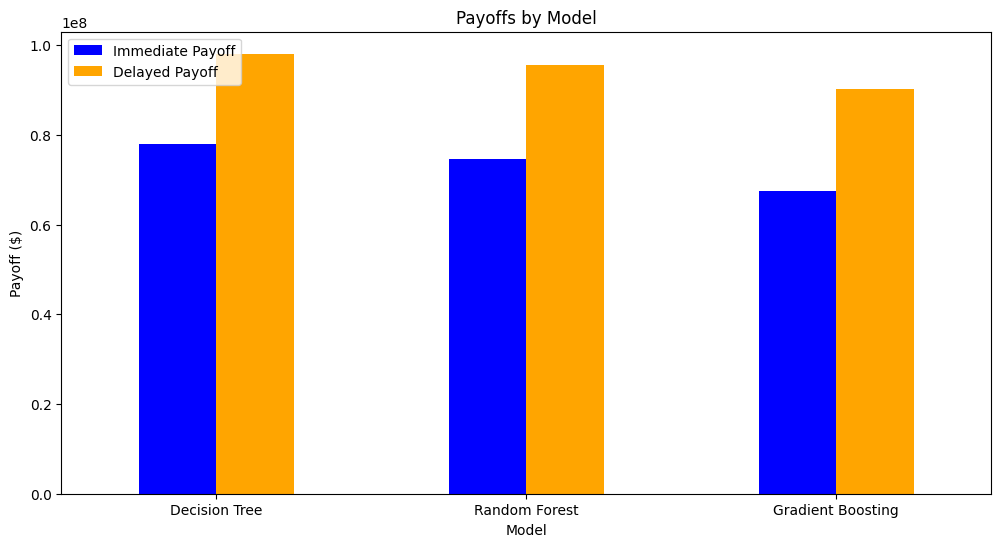

In [ ]:
# Comparative Payoff Visualization
payoffs_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Immediate Payoff": [results[model]["Immediate Payoff"] for model in results],
    "Delayed Payoff": [results[model]["Delayed Payoff"] for model in results]
})
payoffs_df.set_index("Model").plot(kind="bar", figsize=(12, 6), color=["blue", "orange"])
plt.title("Payoffs by Model")
plt.ylabel("Payoff ($)")
plt.xticks(rotation=0)
plt.legend(["Immediate Payoff", "Delayed Payoff"], loc="upper left")
plt.show()

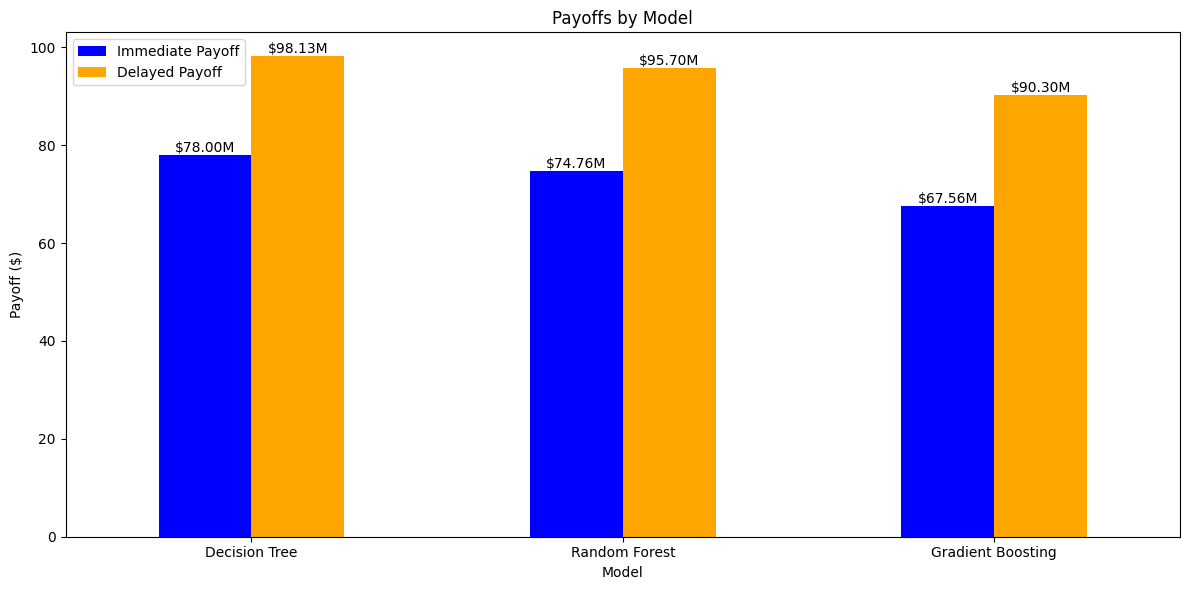

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample results data for demonstration
results = {
    "Decision Tree": {"Immediate Payoff": 78.00, "Delayed Payoff": 98.13},
    "Random Forest": {"Immediate Payoff": 74.76, "Delayed Payoff": 95.70},
    "Gradient Boosting": {"Immediate Payoff": 67.56, "Delayed Payoff": 90.30}
}

# Create a DataFrame from the results
payoffs_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Immediate Payoff": [results[model]["Immediate Payoff"] for model in results],
    "Delayed Payoff": [results[model]["Delayed Payoff"] for model in results]
})

# Set the model as the index for better readability
payoffs_df.set_index("Model", inplace=True)

# Plot the bar chart
ax = payoffs_df.plot(kind="bar", figsize=(12, 6), color=["blue", "orange"])

# Title and labels
plt.title("Payoffs by Model")
plt.ylabel("Payoff ($)")
plt.xticks(rotation=0)

# Add values on top of the bars with 'M' notation
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}M",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Legend
plt.legend(["Immediate Payoff", "Delayed Payoff"], loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()
